# Visualize Vectrino time series data with and without filtering

Explores individual velocity time series from a Vectrino.

Needs:
- Vectrino ```*.dat``` ASCII time series data

User input:
- Data folder
- Frequency at which the data was collected, e.g. 25 Hz
- SNR and COR filter criteria

Version/Change log:
- v01: designed for EFM class
- v02: updated for chub project 2/22/22 KS

## Loads

In [10]:
# %pylab inline
import numpy as np
from numpy import log, sin, cos, exp, tan, pi
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

%matplotlib inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display, uncomment while working

# uncomment the two lines below when exporting to a pdf
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png','pdf')

## Find the data files and prep for loading the files 

In [11]:
""" --- User input ----------------------------- """

fs = 25 # frequency in Hz that the data was recorded at

cf = 70   # correlation filter, drop everything below
snrf = 10 # snr filter, drop everything below this value

# datadir = 'ADV_test/' # path to the data
datadir = 'test_data/' # path to the data

"""  ------------------------------------------- """

ext = '*.dat'     # data file extension

fig_folder = 'Figures'
# Make the output folder
if os.path.isdir(fig_folder) != 1:
    os.mkdir(fig_folder)

# Specify the column header names in the *.dat files. These names can be found in the .hrd file.

cnames = ['time_s','status','v1_m_s', 'v2_m_s','v3_m_s','v4_m_s','amp1', 'amp2','amp3','amp4',
         'snr1', 'snr2','snr3','snr4','cor1', 'cor2','cor3','cor4']

# Find all of the data files and store the names 

files = sorted(glob.glob(datadir+ext))
nf=len(files)
os.chdir(datadir)
filenames = sorted(glob.glob(ext))
for i in range(0,nf):
    filenames[i]=os.path.splitext(os.path.basename(filenames[i]))[0] #strips extension
os.chdir("..")
    
#strip the endings 

datapt=filenames.copy()
for i in range(0,len(filenames)):
    stname = filenames[i]
    datapt[i]=stname[0:8]
    
#Print the file names and index value for each file

for i in range(0,nf):
    print('file: ',filenames[i],'(index: ',i,')')

file:  Run1B_01 (index:  0 )
file:  Run1B_02 (index:  1 )
file:  Run1B_03 (index:  2 )
file:  Run1B_04 (index:  3 )
file:  Run1B_05 (index:  4 )
file:  Run1B_06 (index:  5 )
file:  Run1B_07 (index:  6 )
file:  Run1B_08 (index:  7 )
file:  Run1B_09 (index:  8 )
file:  Run1B_10 (index:  9 )
file:  Run1B_11 (index:  10 )


## Select the file to look at

In [12]:
""" --- User input ----------------------------- """
j = 3 # select the file index to look at
"""  ------------------------------------------- """
print('file: ',filenames[j],'(index: ',j,')')

file:  Run1B_04 (index:  3 )


## Unfiltered data

In [13]:
# read data from a single file into a pandas dataframe

data = pd.read_csv(files[j], sep='\s+', header=None) # reads in the data
data.columns = cnames # renames the columns
data.iloc[:,0]=np.arange(len(data))/fs # changes the counter to time
data=data.drop(['status'], axis=1)  # delete the "status" column
print('number of rows =',len(data))
data.head(5) # display the first five lines of the dataframe

number of rows = 2985


,time_s,v1_m_s,v2_m_s,v3_m_s,v4_m_s,amp1,amp2,amp3,amp4,snr1,snr2,snr3,snr4,cor1,cor2,cor3,cor4
0,0.00,0.666,0.069,-0.073,0.0,188,182,177,150,18.6,21.1,15.7,15.6,77,77,73,70
1,0.04,0.474,0.115,0.075,0.0,187,179,179,154,18.6,21.0,15.8,15.8,78,78,72,65
2,0.08,0.497,0.063,0.008,0.0,190,186,179,154,18.7,21.3,15.8,15.8,84,81,75,78
3,0.12,0.666,-0.026,-0.026,0.0,188,180,179,153,18.6,21.0,15.8,15.7,85,71,79,74
4,0.16,0.783,0.029,-0.045,0.0,190,181,177,153,18.7,21.1,15.7,15.7,82,71,80,82


## Plot the unfiltered data

mean u velocity [m/s] = 0.69
mean v velocity [m/s] = 0.0
mean w velocity [m/s] = -0.02


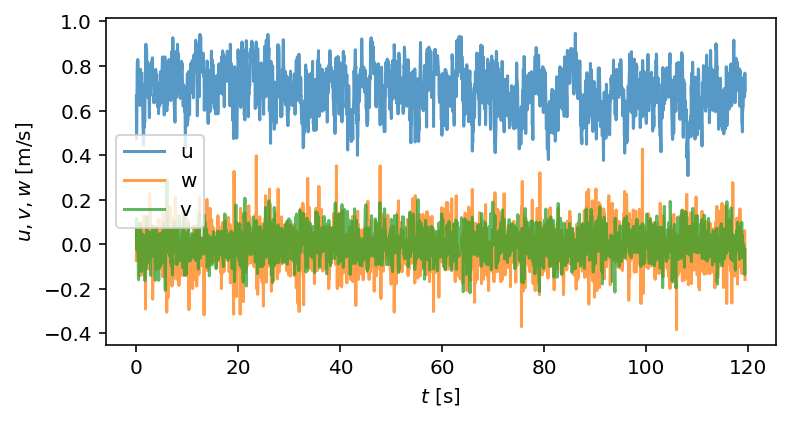

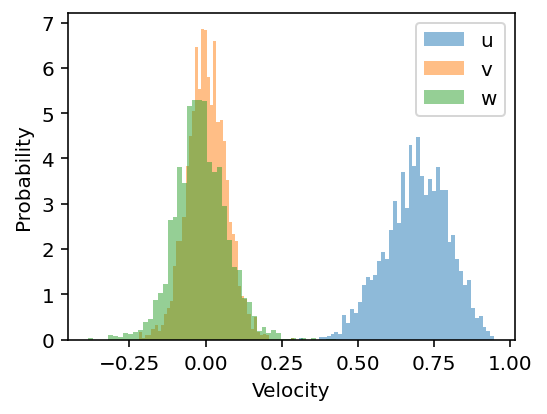

In [14]:
# calculate the means

uavg = data.v1_m_s.mean()
vavg = data.v2_m_s.mean()
wavg = data.v3_m_s.mean()

print('mean u velocity [m/s] =',np.around(uavg,decimals=2))
print('mean v velocity [m/s] =',np.around(vavg,decimals=2))
print('mean w velocity [m/s] =',np.around(wavg,decimals=2))

# plot the velocity time series

# fig, ax = plt.subplots() # don't specify the size
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v1_m_s, alpha=0.75, label='u')
ax.plot(data.time_s,data.v3_m_s,alpha=0.75, label='w')
ax.plot(data.time_s,data.v2_m_s, alpha=0.75,label='v')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u,v,w$ [m/s]')
# ax.set_ylim(-0.25,0.7)
# ax.text(0,-0.2, datapt[j]+' ($z/h =$'+str(np.around(zdata.z_h[j],decimals=2))+')', backgroundcolor='none', clip_on='True', multialignment='center', alpha=1) #weight = 'bold', 
plt.legend(loc='best', ncol=1)
plt.savefig(fig_folder+'/'+datapt[j]+'_timeseries_unfiltered.pdf',bbox_inches="tight", pad_inches=0.005)

fig, ax = plt.subplots(figsize=(4,3))
plt.hist(data.v1_m_s, 50, density=True, alpha=0.5, label='u')
plt.hist(data.v2_m_s, 50, density=True, alpha=0.5, label='v')
plt.hist(data.v3_m_s, 50, density=True, alpha=0.5, label='w')
plt.xlabel('Velocity')
plt.ylabel('Probability')
plt.legend();
plt.savefig(fig_folder+'/'+datapt[j]+'_pdf_unfiltered.pdf',bbox_inches="tight", pad_inches=0.005)

## Filter the data based on SNR and COR values

In [15]:
# filter based on SNR and COR

dataf = data[(data.cor1 >= cf)&(data.cor2 >= cf)&(data.cor3 >= cf)&(data.cor3 >= cf)
            &(data.snr1 >= snrf)&(data.snr2 >= snrf)&(data.snr3 >= snrf)&(data.snr4 >= snrf)].copy()
print('number of rows removed =', len(data)-len(dataf))

number of rows removed = 947


## Plot the filtered data

mean u velocity [m/s] = 0.7
mean v velocity [m/s] = 0.0
mean w velocity [m/s] = -0.02


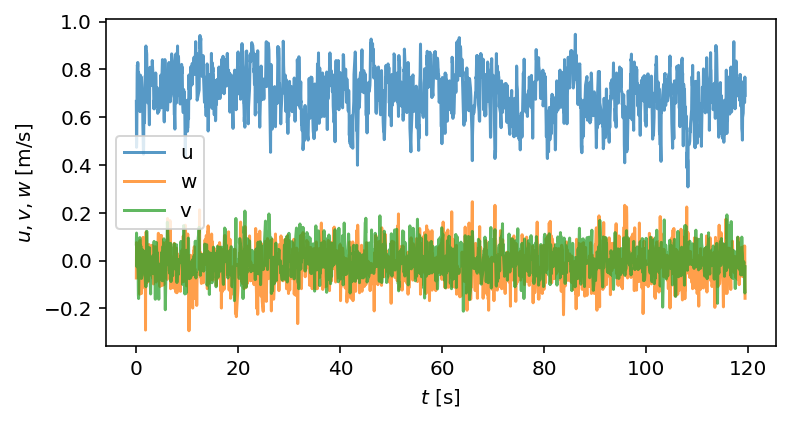

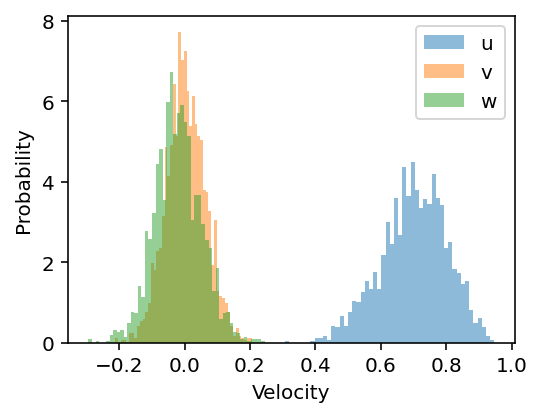

In [16]:
# calculate the means

uavgf = dataf.v1_m_s.mean()
vavgf = dataf.v2_m_s.mean()
wavgf = dataf.v3_m_s.mean()

print('mean u velocity [m/s] =',np.around(uavgf,decimals=2))
print('mean v velocity [m/s] =',np.around(vavgf,decimals=2))
print('mean w velocity [m/s] =',np.around(wavgf,decimals=2))

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(dataf.time_s,dataf.v1_m_s, alpha=0.75, label='u')
ax.plot(dataf.time_s,dataf.v3_m_s,alpha=0.75, label='w')
ax.plot(dataf.time_s,dataf.v2_m_s, alpha=0.75,label='v')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u,v,w$ [m/s]')
# ax.set_ylim(-0.25,0.7)
# ax.text(0,-0.2, datapt[j]+' ($z/h =$'+str(np.around(zdata.z_h[j],decimals=2))+')', backgroundcolor='none', clip_on='True', multialignment='center', alpha=1) #weight = 'bold', 
# plt.legend(fontsize=8, frameon=False)
plt.legend(loc='best', ncol=1)
plt.savefig(fig_folder+'/'+datapt[j]+'_timeseries_filtered.pdf',bbox_inches="tight", pad_inches=0.005)

fig, ax = plt.subplots(figsize=(4,3))
plt.hist(dataf.v1_m_s, 50, density=True, alpha=0.5, label='u')
plt.hist(dataf.v2_m_s, 50, density=True, alpha=0.5, label='v')
plt.hist(dataf.v3_m_s, 50, density=True, alpha=0.5, label='w')
plt.xlabel('Velocity')
plt.ylabel('Probability')
plt.legend();
plt.savefig(fig_folder+'/'+datapt[j]+'_pdf_filtered.pdf',bbox_inches="tight", pad_inches=0.005)

## Compare the filted and unfiltered

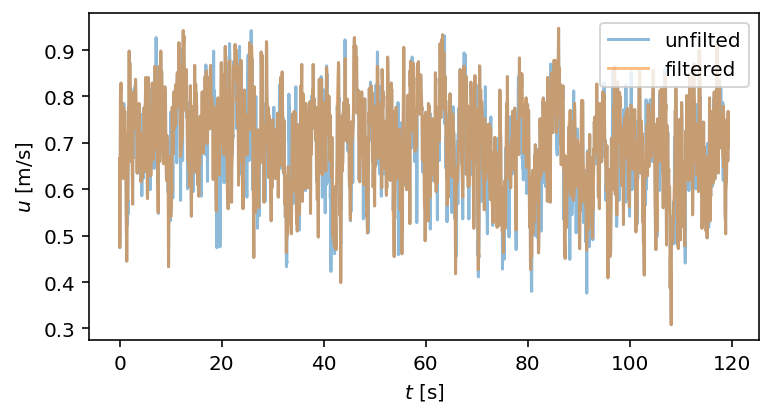

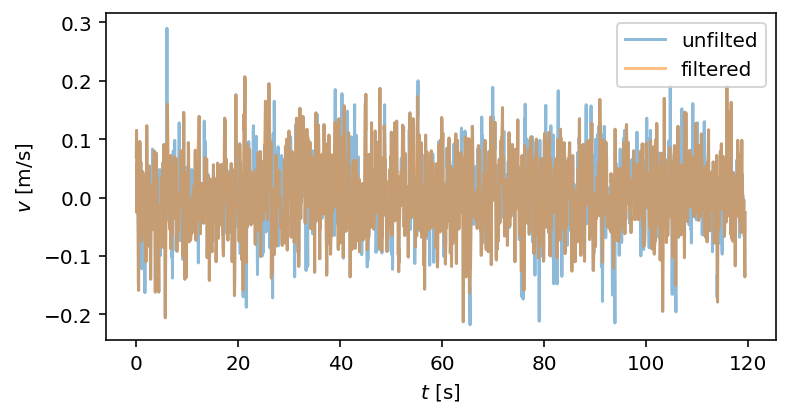

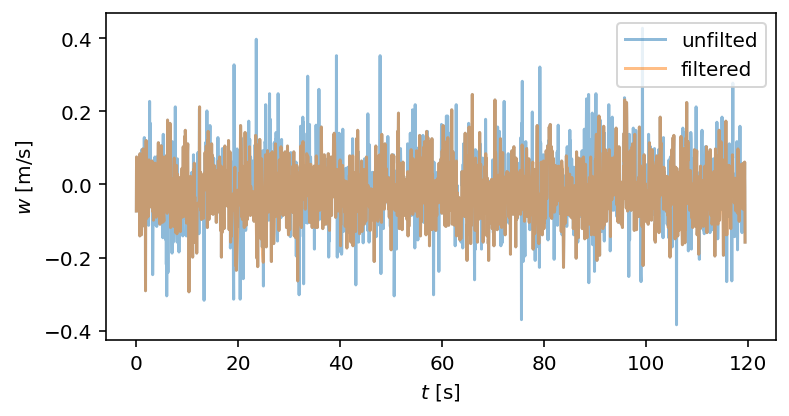

In [17]:
# plot the u filtered and unfiltered
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v1_m_s, alpha=0.5, label='unfilted')
ax.plot(dataf.time_s,dataf.v1_m_s, alpha=0.5, label='filtered')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u$ [m/s]')
plt.legend(loc=1, ncol=1);

# plot the v filtered and unfiltered
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v2_m_s, alpha=0.5, label='unfilted')
ax.plot(dataf.time_s,dataf.v2_m_s, alpha=0.5, label='filtered')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$v$ [m/s]')
plt.legend(loc=1, ncol=1);

# plot the w filtered and unfiltered
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v3_m_s, alpha=0.5, label='unfilted')
ax.plot(dataf.time_s,dataf.v3_m_s, alpha=0.5, label='filtered')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$w$ [m/s]')
plt.legend(loc=1, ncol=1);

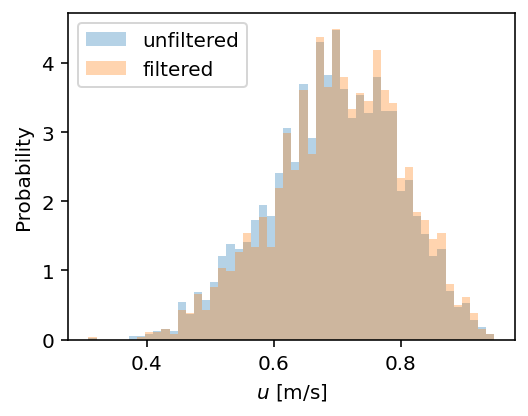

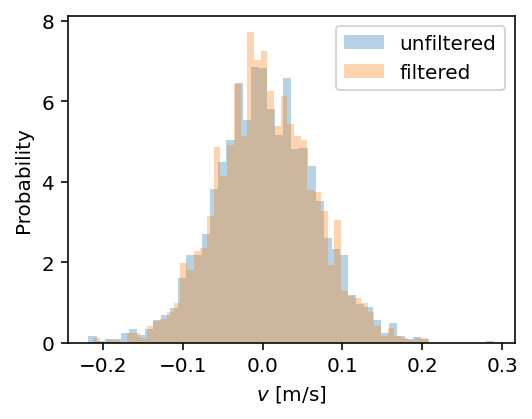

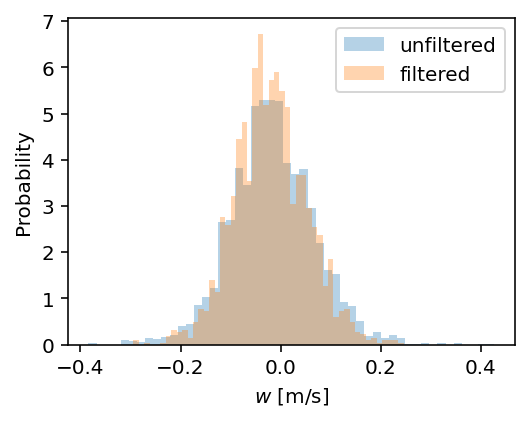

In [18]:
fig, ax = plt.subplots(figsize=(4,3))
plt.hist(data.v1_m_s, 50, density=True, alpha=0.33, label='unfiltered')
plt.hist(dataf.v1_m_s, 50, density=True, alpha=0.33, label='filtered')
plt.xlabel('$u$ [m/s]')
plt.ylabel('Probability')
plt.legend();

fig, ax = plt.subplots(figsize=(4,3))
plt.hist(data.v2_m_s, 50, density=True, alpha=0.33, label='unfiltered')
plt.hist(dataf.v2_m_s, 50, density=True, alpha=0.33, label='filtered')
plt.xlabel('$v$ [m/s]')
plt.ylabel('Probability')
plt.legend();

fig, ax = plt.subplots(figsize=(4,3))
plt.hist(data.v3_m_s, 50, density=True, alpha=0.33, label='unfiltered')
plt.hist(dataf.v3_m_s, 50, density=True, alpha=0.33, label='filtered')
plt.xlabel('$w$ [m/s]')
plt.ylabel('Probability')
plt.legend();